16.03750000000001


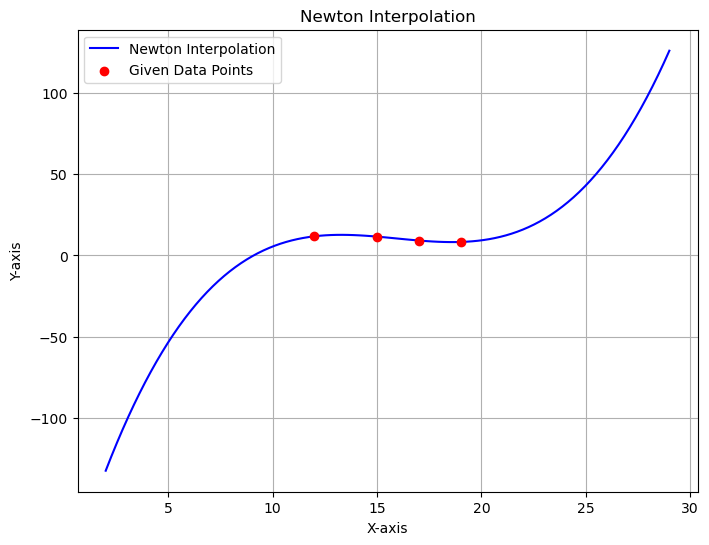

In [3]:
#Newton插值
from math import *
import matplotlib.pyplot as plt



s=input("请输入x0,y0,x1,y1,x2......")
num=s.split(',')
l=len(num)

x=[]
y=[]
for i in range(l):
    if i % 2 == 0:
        x.append(float(num[i]))
    if i % 2 == 1:
        y.append(float(num[i]))


def f(x,y,i,j):
    if i==j:
        return y[i]
    else:
        return (f(x,y,i+1,j)-f(x,y,i,j-1))/(x[j]-x[i])

def newton(x0,x,y):
    sum = y[0]
    n = len(x)
    for j in range(1,n):
        s = 1
        for i in range(j):
            s = s * (x0-x[i])
        sum = sum + s*f(x,y,0,j)

    return sum

ver=input("请输入想要的y对应的x")
ver = float(ver)
print(newton(ver,x,y))



x_min = min(x)-10
x_max = max(x)+10
x_range = x_max - x_min
x_values = [x_min + i * x_range / 100 for i in range(101)]  # 生成100个点

# 计算对应的y值
y_values = [newton(x_val, x, y) for x_val in x_values]

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Newton Interpolation", color="blue")
plt.scatter(x, y, label="Given Data Points", color="red", zorder=5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Newton Interpolation")
plt.legend()
plt.grid(True)
plt.show()


插商表：
x_i	f^0(x_i)	f^1(x_i)	
1.00000	1.00000	
2.00000	2.00000	1.00000	
对应的 y 值为: 3.0


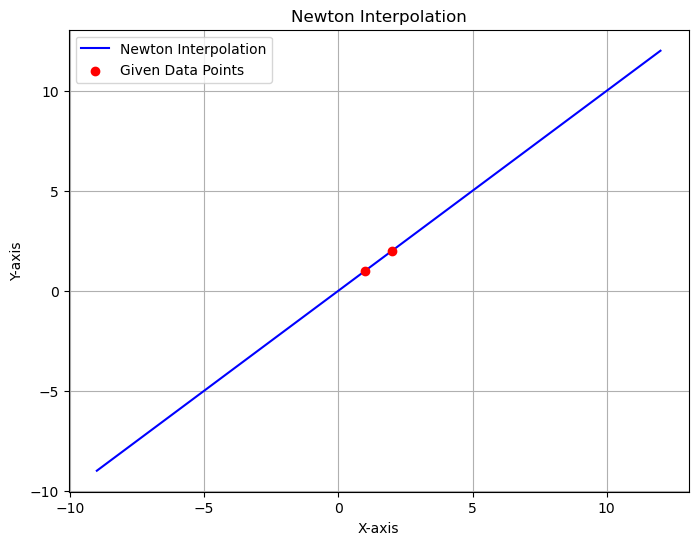

In [3]:
from math import *
import matplotlib.pyplot as plt

# 输入数据
s = input("请输入x0,y0,x1,y1,x2......")
num = s.split(',')
l = len(num)

x = []
y = []
for i in range(l):
    if i % 2 == 0:
        x.append(float(num[i]))
    if i % 2 == 1:
        y.append(float(num[i]))

# 递归计算差商
def f(x, y, i, j):
    if i == j:
        return y[i]
    else:
        return (f(x, y, i + 1, j) - f(x, y, i, j - 1)) / (x[j] - x[i])

# Newton 插值函数
def newton(x0, x, y):
    sum = y[0]
    n = len(x)
    for j in range(1, n):
        s = 1
        for i in range(j):
            s = s * (x0 - x[i])
        sum = sum + s * f(x, y, 0, j)
    return sum

# 计算插商表并打印
def print_difference_table(x, y):
    n = len(x)
    table = [[0.0 for _ in range(n)] for _ in range(n)]
    
    # 填充插商表
    for i in range(n):
        table[i][0] = y[i]
    
    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x[i + j] - x[i])
    
    # 打印插商表，保留5位小数
    print("插商表：")
    print("x_i", end="\t")
    for j in range(n):
        print(f"f^{j}(x_i)", end="\t")
    print()
    
    for i in range(n):
        print(f"{x[i]:.5f}", end="\t")
        for j in range(i + 1):
            print(f"{table[i - j][j]:.5f}", end="\t")
        print()

# 打印插商表
print_difference_table(x, y)

# 用户输入想要计算的 x 值
ver = input("请输入想要的 y 对应的 x:")
ver = float(ver)
print("对应的 y 值为:", newton(ver, x, y))

# 生成 x 轴的范围
x_min = min(x) - 10
x_max = max(x) + 10
x_range = x_max - x_min
x_values = [x_min + i * x_range / 100 for i in range(101)]  # 生成 100 个点

# 计算对应的 y 值
y_values = [newton(x_val, x, y) for x_val in x_values]

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Newton Interpolation", color="blue")
plt.scatter(x, y, label="Given Data Points", color="red", zorder=5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Newton Interpolation")
plt.legend()
plt.grid(True)
plt.show()